## Import libraries

In [1]:
from scraper import *
import pandas as pd
import isthmuslib as isli
from tqdm.auto import tqdm
import pathlib

## Setup params

In [2]:
cache_path: str = str(pathlib.Path.cwd() / '..' / 'data' / '2021_12_29_data.pickle')
style: isli.Style = isli.Style(watermark_text="             Isthmus - github.com/mitchellpkt/firo-forensics",
                               watermark_fontsize=12, grid=False)

## Initialize - load from cache or scrape

In [3]:
if cache_path:
    df: pd.DataFrame = pd.read_pickle(cache_path)
else:   
    for height in tqdm(range(437410, 438059)):
        df = df.append(get_metadata(height), ignore_index=True)
    df: pd.DataFrame = pd.DataFrame({'height': []})
    df.to_pickle(cache_path)

In [4]:
df.head()  # See the result

,height,block_height,coinbase_data,decoded_coinbase,timestamp_human,timestamp_unix
0,NaN,437410.0,cd68d274f8a37499743e7bcec3b955923b2131b36d93b5...,¢¬ÌÝÊa    c2Miners https://2miners.com,"Tue, 28 Dec 2021 09:50:04 UTC",1.640685e+09
1,NaN,437411.0,fa697a0264752ecd499c104480956acc68a934ad7aca5b...,£¬%ÞÊa     Á¿2Miners https://2miners.com,"Tue, 28 Dec 2021 09:51:33 UTC",1.640685e+09
2,NaN,437412.0,3b088551d172830e682128e8611abb3717cbcc228a8660...,¤¬ÞÊa     ~'2Miners https://2miners.com,"Tue, 28 Dec 2021 09:53:06 UTC",1.640685e+09
3,NaN,437413.0,35a59f1f10db69ccb6f2ea7cdad70c9f20ace4a800ca8a...,¥¬ÞÊa     2Miners https://2miners.com,"Tue, 28 Dec 2021 09:53:18 UTC",1.640685e+09
4,NaN,437414.0,aef1f230fcb120eb307fbdbba8322628cb50f86a6de5e3...,¦¬ ãÊa     É2Miners https://2miners.com,"Tue, 28 Dec 2021 10:12:16 UTC",1.640686e+09


In [5]:
df.describe()

,height,block_height,timestamp_unix
count,0.0,649.000000,6.490000e+02
mean,NaN,437734.000000,1.640774e+09
std,NaN,187.494444,5.241967e+04
min,NaN,437410.000000,1.640685e+09
25%,NaN,437572.000000,1.640729e+09
50%,NaN,437734.000000,1.640774e+09
75%,NaN,437896.000000,1.640819e+09
max,NaN,438058.000000,1.640868e+09


## Visualizations

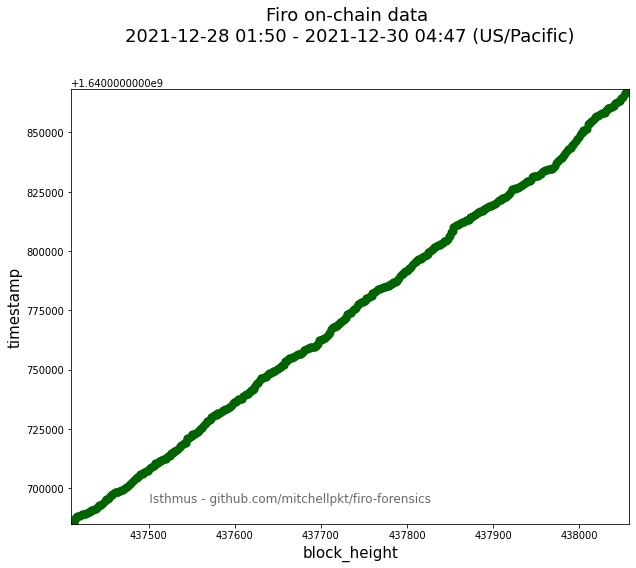

In [6]:
title: str = f'Firo on-chain data \n{isli.human_time(min(df.timestamp_unix), formatter="%Y-%m-%d %H:%M", include_timezone=False)} - {isli.human_time(max(df.timestamp_unix), formatter="%Y-%m-%d %H:%M")}\n'
isli.scatter(df, 'block_height', 'timestamp_unix', xlabel='block_height', ylabel='timestamp',
             title=f"{title}\n", style=style, legend_strings=[]);

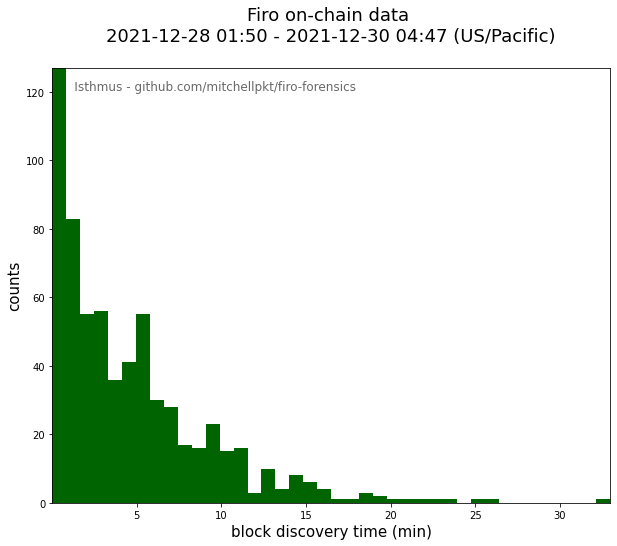

In [7]:
isli.hist((diffs := [(x[0] - x[1]) / 60 for x in zip(df.timestamp_unix[1:], df.timestamp_unix)]), title=title, bins=40,
          xlabel='block discovery time (min)', style=style.override({'watermark_placement': (-0.05, 0.95)}));

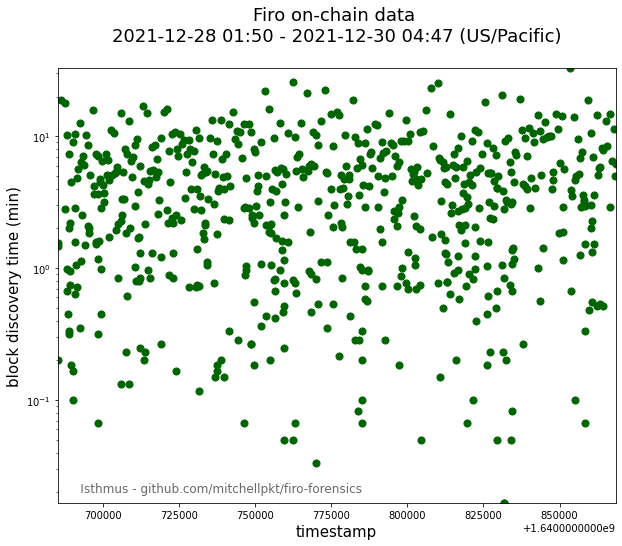

In [8]:
isli.scatter(df.timestamp_unix[1:], diffs, ylabel='block discovery time (min)', xlabel='timestamp', title=title,
             style=style.override({'watermark_placement': (-0.05, 0.025)}), log_axes='y', );



